# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime

#this function will allow me to get a list of cities which are nearest to a set of lat/longs i create
from citipy import citipy

# Google and weather API Keys
from api_keys import g_key, weather_api_key

## Generate Cities List

In [2]:
# first create a "random" set of lat/longs

lats = np.random.uniform(low = -90, high = 90, size = 750)
lngs = np.random.uniform(low = -180, high = 180, size = 750)

city = []
country = []

# now those lat/longs have to be in pairs to use the citipy function
lat_lng = zip(lats, lngs)

# run a loop calling citipy to get the nearest city to the lat/long created
for lat in lat_lng:
    city.append(citipy.nearest_city(lat[0], lat[1]).city_name)
    country.append(citipy.nearest_city(lat[0], lat[1]).country_code)

# create a list of all the data
cities_to_truncate = [city, country]   #, city_lat, city_lng

# make sure the cities are unique then cut the list to 500  
np.unique(cities_to_truncate)

cities = cities_to_truncate[0][:500]
countries = cities_to_truncate[1][:500]

# i have a list of "random" cities to use

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create the base url and the lists which i'll be using to store data

base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial'
city_lats = []
city_lngs = []
temps = []
humidities = []
cloudiness = []
wind_speeds = []
dates = []
count = 0

# loop through the data, call it through the api, then create lists of the needed data
# there will be cities which will not be in the weather app, so use try/except
for city in cities:
    try:
        url_string = (base_url + '&appid=' + weather_api_key + '&q=' + city)
        city_lat_lng = requests.get(url_string)
        weather_data = city_lat_lng.json()
        city_lats.append(weather_data['coord']['lat'])
        city_lngs.append(weather_data['coord']['lon'])
        temps.append(weather_data['main']['temp_max'])
        humidities.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all'])
        wind_speeds.append(weather_data['wind']['speed'])
        dates.append(weather_data['dt'])
        city_num = (weather_data['id'])
        print(f"City: {city}  City ID: {city_num}")

    except:
        print("City not found")
        city_lats.append(0)
        city_lngs.append(0)
        temps.append(0)
        humidities.append(101)  #make the humidity over 100 to remove the city later
        cloudiness.append(0)
        wind_speeds.append(0)
        dates.append(0)
        
# the list of cities now has all the weather details, with the cities not found marked

City: new norfolk  City ID: 2155415
City: norrtalje  City ID: 2688250
City: mayo  City ID: 4362001
City: sola  City ID: 2134814
City not found
City: dzhebariki-khaya  City ID: 2024626
City: saint-marc  City ID: 3717588
City: chanute  City ID: 4269392
City: qaanaaq  City ID: 3831208
City: tuktoyaktuk  City ID: 6170031
City: yellowknife  City ID: 6185377
City: rafai  City ID: 236524
City: busselton  City ID: 2075265
City: arraial do cabo  City ID: 3471451
City: butaritari  City ID: 2110227
City: port alfred  City ID: 964432
City: avarua  City ID: 4035715
City: ushuaia  City ID: 3833367
City: ponta do sol  City ID: 2264557
City: albany  City ID: 5106841
City: saint-philippe  City ID: 935215
City: ushuaia  City ID: 3833367
City: sitka  City ID: 5557293
City: auchi  City ID: 2348892
City: ushuaia  City ID: 3833367
City: lebu  City ID: 3883457
City: alugan  City ID: 1731248
City: yellowknife  City ID: 6185377
City: pevek  City ID: 2122090
City: kem  City ID: 551145
City: aklavik  City ID: 58

City: tecoanapa  City ID: 3516171
City: pangnirtung  City ID: 6096551
City: kokoda  City ID: 2093691
City: klaksvik  City ID: 2618795
City: bluff  City ID: 2206939
City: tazovskiy  City ID: 1489853
City: seoul  City ID: 1835848
City: bambous virieux  City ID: 1106677
City: kapaa  City ID: 5848280
City: saint george  City ID: 5546220
City: sao filipe  City ID: 3374210
City: torbay  City ID: 6167817
City: khatanga  City ID: 2022572
City: slave lake  City ID: 6149374
City: port alfred  City ID: 964432
City: bethel  City ID: 5282297
City: flin flon  City ID: 5954718
City: ponta do sol  City ID: 2264557
City: saskylakh  City ID: 2017155
City: bull savanna  City ID: 3491161
City: ushuaia  City ID: 3833367
City: ushuaia  City ID: 3833367
City: sembe  City ID: 2255304
City: henties bay  City ID: 3356832
City not found
City: rikitea  City ID: 4030556
City: cape town  City ID: 3369157
City: hilo  City ID: 5855927
City: kununurra  City ID: 2068110
City not found
City: albany  City ID: 5106841
Cit

In [4]:
# keep this code if it's needed to see the structure of the json data coming back from weather
# print(json.dumps(weather_data, indent=2, sort_keys=True))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a weather data frame
#first convert unix date_time to standard

from datetime import date
date_time = []

# change the unix times to mon/day/yr format
for row in dates:
    date_time.append(date.fromtimestamp(row).strftime('%m-%d-%Y'))

city_weather = {"City": cities,
                "Lat": city_lats,
                "Lng": city_lngs,
                "High Temp": temps,
                "Humidity": humidities,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speeds,
                "Country": countries,
                "Date Time": date_time
               }
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.head()


,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date Time
0,new norfolk,-42.78,147.06,54.00,58,23,1.01,au,10-13-2020
1,norrtalje,59.76,18.70,46.99,85,43,4.00,se,10-13-2020
2,mayo,38.89,-76.51,63.00,93,75,13.47,ca,10-13-2020
3,sola,-13.88,167.55,81.81,70,59,1.92,vu,10-13-2020
4,amderma,0.00,0.00,0.00,101,0,0.00,ru,12-31-1969


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
cities_more_100 = city_weather_df.loc[city_weather_df['Humidity']>100]
cities_more_100

,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date Time
4,amderma,0.0,0.0,0.0,101,0,0.0,ru,12-31-1969
39,belushya guba,0.0,0.0,0.0,101,0,0.0,ru,12-31-1969
55,illoqqortoormiut,0.0,0.0,0.0,101,0,0.0,gl,12-31-1969
58,chagda,0.0,0.0,0.0,101,0,0.0,ru,12-31-1969
68,ust-kamchatsk,0.0,0.0,0.0,101,0,0.0,ru,12-31-1969
72,taolanaro,0.0,0.0,0.0,101,0,0.0,mg,12-31-1969
89,samusu,0.0,0.0,0.0,101,0,0.0,ws,12-31-1969
90,amderma,0.0,0.0,0.0,101,0,0.0,ru,12-31-1969
110,tsihombe,0.0,0.0,0.0,101,0,0.0,mg,12-31-1969
125,vaitupu,0.0,0.0,0.0,101,0,0.0,wf,12-31-1969


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_weather_df.loc[city_weather_df['Humidity']<=100]
clean_city_data.head()

,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date Time
0,new norfolk,-42.78,147.06,54.00,58,23,1.01,au,10-13-2020
1,norrtalje,59.76,18.70,46.99,85,43,4.00,se,10-13-2020
2,mayo,38.89,-76.51,63.00,93,75,13.47,ca,10-13-2020
3,sola,-13.88,167.55,81.81,70,59,1.92,vu,10-13-2020
5,dzhebariki-khaya,62.22,135.80,25.23,95,99,8.75,ru,10-13-2020


In [8]:
# output the csv file of all the cities which weather can find
clean_city_data.to_csv('../output_data/cities.csv')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

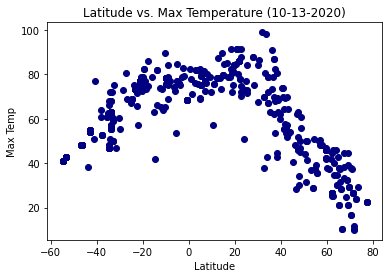

In [9]:
# create the date of the data pull to use in the title
current_date = clean_city_data.at[0,'Date Time']

# scatter plot to observe trends
plt.scatter(clean_city_data['Lat'],clean_city_data['High Temp'],marker="o",color="navy")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Latitude vs. Max Temperature ({current_date})")

# save the pic
plt.savefig('../output_data/lat_v_temp.png')

plt.show()

## Latitude vs. Humidity Plot

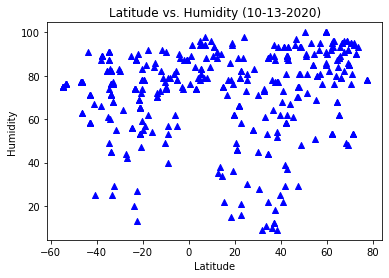

In [10]:
# scatter plot to observe trends

plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],marker="^",color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Latitude vs. Humidity ({current_date})")

# save the pic
plt.savefig('../output_data/lat_v_humid.png')

plt.show()


## Latitude vs. Cloudiness Plot

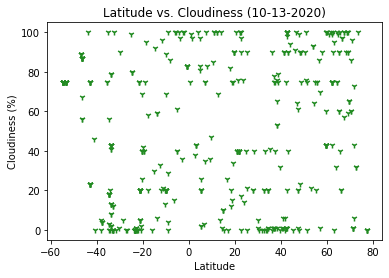

In [11]:
# scatter plot to observe trends
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],marker="1",color="forestgreen")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Latitude vs. Cloudiness ({current_date})")

# save the pic
plt.savefig('../output_data/lat_v_cloudiness.png')

plt.show()


## Latitude vs. Wind Speed Plot

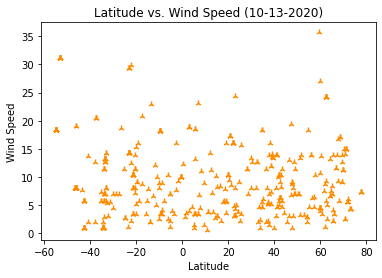

In [12]:
# scatter plot to observe trends

plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],marker="2",color="darkorange")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Latitude vs. Wind Speed ({current_date})")

# save the pic
plt.savefig('../output_data/lat_v_wind_speed.png')

plt.show()


## Linear Regression

In [13]:
# start with dividing the data into northern and southern hemisphere

northern_data = clean_city_data.loc[clean_city_data['Lat'] >= 0]
southern_data = clean_city_data.loc[clean_city_data['Lat'] <= 0]
southern_data

,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date Time
0,new norfolk,-42.78,147.06,54.00,58,23,1.01,au,10-13-2020
3,sola,-13.88,167.55,81.81,70,59,1.92,vu,10-13-2020
12,busselton,-33.65,115.33,63.00,71,43,13.27,au,10-13-2020
13,arraial do cabo,-22.97,-42.03,73.22,87,1,29.39,br,10-13-2020
15,port alfred,-33.59,26.89,56.52,76,2,12.62,za,10-13-2020
...,...,...,...,...,...,...,...,...,...
485,ushuaia,-54.80,-68.30,41.00,75,75,18.34,ar,10-13-2020
486,rikitea,-23.12,-134.97,73.44,74,0,14.34,pf,10-13-2020
491,esperance,-33.87,121.90,62.60,82,79,5.82,au,10-13-2020
495,hobart,-42.88,147.33,55.00,71,75,5.82,au,10-13-2020


In [14]:
# create a linear regression function which creates the plots with the call

def lin_regression(x_values, y_values, mrkr, clr, ann_x, ann_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, marker=mrkr,color=clr)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(ann_x,ann_y),fontsize=15,color="black")

In [15]:
# create an r-squared function which prints out the value
def r_value(x_r, y_r):
    correlation_matrix = np.corrcoef(x_r, y_r)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    print(f"r-squared value: {r_squared}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared value: 0.7566706132516555


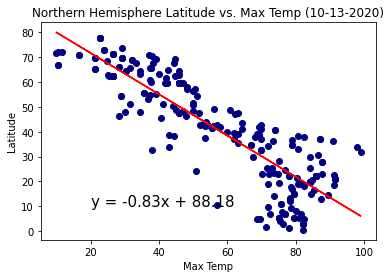

In [16]:
# calculate r-squared and create linear regression plot using the r_value and lin_regression 
# function which i've created.  Create labeling below
r_value(northern_data['High Temp'],northern_data['Lat'])
lin_regression(northern_data['High Temp'],northern_data['Lat'], 'o', 'navy', 20, 10)

plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.title(f"Northern Hemisphere Latitude vs. Max Temp ({current_date})")

plt.show()
#correlation betw latitude and temp is very high

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared value: 0.7045803490524226


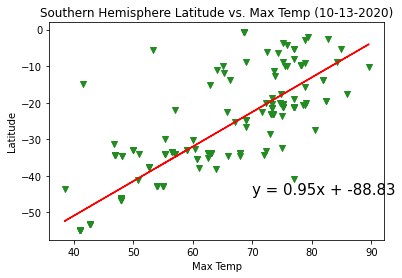

In [19]:
# calculate r-squared and create linear regression plot using the r_value and lin_regression 
# function which i've created.  Create labeling below
r_value(southern_data['High Temp'],southern_data['Lat'])
lin_regression(southern_data['High Temp'],southern_data['Lat'], 'v', 'forestgreen', 70, -45)

plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere Latitude vs. Max Temp ({current_date})')

plt.show()
#correlation betw latitude and temp is very high

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared value: 0.02108743782049464


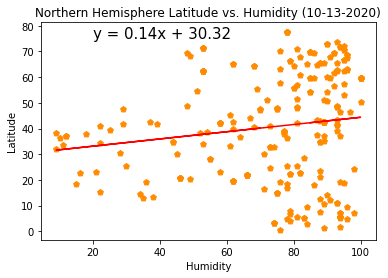

In [20]:
# calculate r-squared and create linear regression plot using the r_value and lin_regression 
# function which i've created.  Create labeling below
r_value(northern_data['Humidity'],northern_data['Lat'])
lin_regression(northern_data['Humidity'],northern_data['Lat'], 'p', 'darkorange', 20, 75)

plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title(f'Northern Hemisphere Latitude vs. Humidity ({current_date})')

plt.show()
#correlation betw latitude and humidity is very, very low

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared value: 0.00011346951915954689


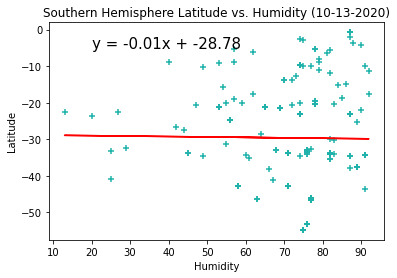

In [21]:
# calculate r-squared and create linear regression plot using the r_value and lin_regression 
# function which i've created.  Create labeling below
r_value(southern_data['Humidity'],southern_data['Lat'])
lin_regression(southern_data['Humidity'],southern_data['Lat'], '+', 'lightseagreen', 20, -5)

plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere Latitude vs. Humidity ({current_date})')

plt.show()
#correlation betw latitude and humidity is very, very, very low

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared value: 0.014913959300057211


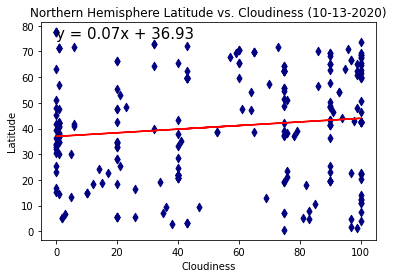

In [22]:
# calculate r-squared and create linear regression plot using the r_value and lin_regression 
# function which i've created.  Create labeling below
r_value(northern_data['Cloudiness'],northern_data['Lat'])
lin_regression(northern_data['Cloudiness'],northern_data['Lat'], 'd', 'navy', 0, 75)

plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title(f'Northern Hemisphere Latitude vs. Cloudiness ({current_date})')

plt.show()
#correlation betw latitude and cloudiness is very, very low

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared value: 0.04649116632968118


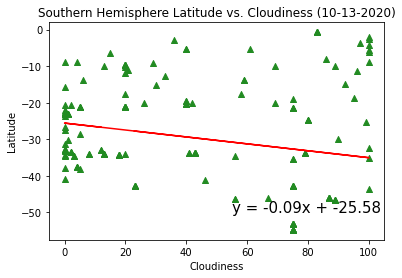

In [23]:
# calculate r-squared and create linear regression plot using the r_value and lin_regression 
# function which i've created.  Create labeling below
r_value(southern_data['Cloudiness'],southern_data['Lat'])
lin_regression(southern_data['Cloudiness'],southern_data['Lat'], '^', 'forestgreen', 55, -50)

plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere Latitude vs. Cloudiness ({current_date})')

plt.show()
#correlation betw latitude and cloudiness is very, very, very low

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared value: 0.00801759077107634


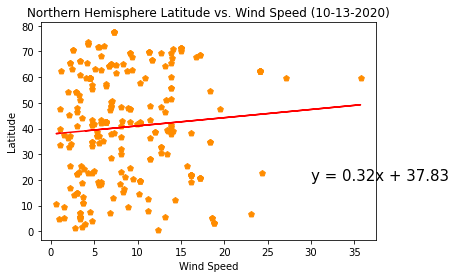

In [24]:
# calculate r-squared and create linear regression plot using the r_value and lin_regression 
# function which i've created.  Create labeling below
r_value(northern_data['Wind Speed'],northern_data['Lat'])
lin_regression(northern_data['Wind Speed'],northern_data['Lat'], 'p', 'darkorange', 30, 20)

plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title(f'Northern Hemisphere Latitude vs. Wind Speed ({current_date})')

plt.show()
#correlation betw latitude and cloudiness is low

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared value: 0.07523397702690633


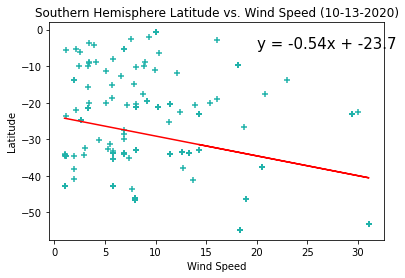

In [25]:
# calculate r-squared and create linear regression plot using the r_value and lin_regression 
# function which i've created.  Create labeling below
r_value(southern_data['Wind Speed'],southern_data['Lat'])
lin_regression(southern_data['Wind Speed'],southern_data['Lat'], '+', 'lightseagreen', 20, -5)

plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere Latitude vs. Wind Speed ({current_date})')

plt.show()
#correlation betw latitude and cloudiness is very, very, very low

In [ ]:
# Observations:1.) Not shocking, but temp is tightly correllated with latitude.
# 2.) I was surprised that humidity has very little corellation with latitude. I would 
# have thought the closer to the equator, the more humid things are.